In [76]:
import pandas as pd
import numpy as np

# import machine learning libraries from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [77]:
cols = ['id', 'label', 'statement', 'subject', 'speaker', 'title', 'state', 'party']

In [78]:
# read in datasets
liar_train = pd.read_csv("liar_dataset/train.tsv", sep='\t', header=None, names=cols, usecols=cols)
liar_test = pd.read_csv("liar_dataset/test.tsv", sep='\t', header=None, names=cols, usecols=cols)
liar_valid = pd.read_csv("liar_dataset/valid.tsv", sep='\t', header=None, names=cols, usecols=cols)

In [79]:
liar_train.head()

,id,label,statement,subject,speaker,title,state,party
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat


### TF-IDF Vectorizer

In [52]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,stop_words='english', ngram_range=(1,3))
X_train = vectorizer.fit_transform(liar_train['statement'])
X_test = vectorizer.transform(liar_test['statement'])
X_valid = vectorizer.transform(liar_valid['statement'])

### Multinomial Naive Bayes Classifier

In [54]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, liar_train['label'])
probs = classifier.predict_proba(X_test)

### Predicted Values

In [64]:
results = pd.concat([liar_test[['label','statement']], pd.DataFrame(probs, columns = classifier.classes_)], axis=1)
results['prediction'] = classifier.predict(X_test)

results.head()

,label,statement,barely-true,false,half-true,mostly-true,pants-fire,true,prediction
0,true,Building a wall on the U.S.-Mexico border will...,0.123923,0.236334,0.266330,0.213154,0.039495,0.120764,half-true
1,false,Wisconsin is on pace to double the number of l...,0.108955,0.219966,0.278728,0.214314,0.035156,0.142880,half-true
2,false,Says John McCain has done nothing to help the ...,0.157423,0.171272,0.246396,0.211399,0.044876,0.168634,half-true
3,half-true,Suzanne Bonamici supports a plan that will cut...,0.193143,0.271448,0.260500,0.126758,0.046539,0.101611,false
4,pants-fire,When asked by a reporter whether hes at the ce...,0.137212,0.468380,0.198787,0.089443,0.040476,0.065701,false


### Correlations between variables

In [66]:
corr = results[['pants-fire','false','barely-true', 'half-true', 'mostly-true','true']].corr()
corr

,pants-fire,false,barely-true,half-true,mostly-true,true
pants-fire,1.000000,0.219087,0.289022,-0.372107,-0.395027,0.008249
false,0.219087,1.000000,0.096202,-0.362076,-0.555262,-0.370509
barely-true,0.289022,0.096202,1.000000,-0.273083,-0.438359,-0.277004
half-true,-0.372107,-0.362076,-0.273083,1.000000,-0.077071,-0.306635
mostly-true,-0.395027,-0.555262,-0.438359,-0.077071,1.000000,0.148767
true,0.008249,-0.370509,-0.277004,-0.306635,0.148767,1.000000


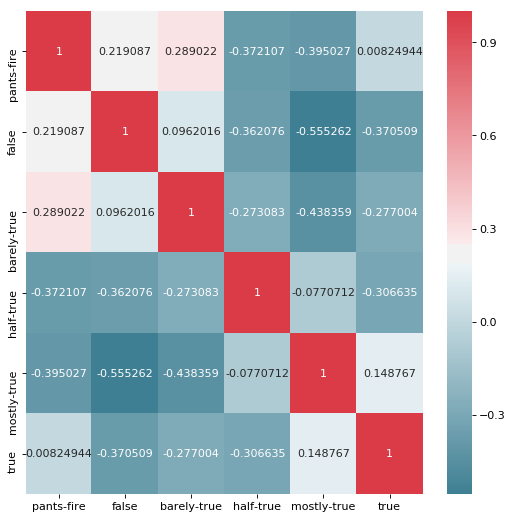

In [69]:
# pretty correlation chart

import seaborn as sns
from matplotlib import pyplot as plt

fig=plt.figure(figsize=(8, 8), dpi=80) 
sns.heatmap(corr, annot=True, fmt='g', cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

### Model Score & Features 

In [70]:
score = classifier.score(X_test, liar_test['label'])
print("TF-IDF & Naive Bayes Classifier accuracy: %0.3f" % score)

TF-IDF & Naive Bayes Classifier accuracy: 0.243


In [74]:
feature_importance = pd.DataFrame(classifier.coef_.T, columns = classifier.classes_)
feature_importance = feature_importance.divide(feature_importance.sum(axis=1),axis=0)
feature_importance['feature'] = vectorizer.get_feature_names()

In [75]:
feature_importance.sort_values('false',ascending=False)[:10]

,barely-true,false,half-true,mostly-true,pants-fire,true,feature
35342,0.171373,0.174128,0.158266,0.159475,0.174095,0.162663,countries
142251,0.167920,0.173593,0.163033,0.161410,0.172822,0.161222,terms
10687,0.167240,0.173217,0.163481,0.168055,0.170657,0.157350,african american
106509,0.163698,0.172889,0.167434,0.162318,0.169907,0.163753,popular
39087,0.169799,0.172674,0.162004,0.159406,0.175658,0.160459,day
70119,0.165443,0.172559,0.156677,0.167693,0.172836,0.164792,increased
109086,0.162638,0.172425,0.162865,0.169313,0.166008,0.166751,privatize
5402,0.165912,0.172359,0.160680,0.159872,0.178158,0.163020,40
53312,0.165385,0.172265,0.167339,0.166851,0.167824,0.160336,federal law
34525,0.168092,0.172182,0.166991,0.157059,0.169335,0.166340,corporate tax
